In [60]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import csv

def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate(X, y, theta, lambda_):
    hFunResult = h_fun(X, theta)
    size = hFunResult.shape[1]
    lin_reg_cost = np.sum(np.square(hFunResult - y))
    sum_of_thetas = (theta[1:, :] ** 2).sum()
    return lin_reg_cost + sum_of_thetas * lambda_ / (2 * size)

def get_theta(X, y, eps, alpha, theta, lambda_, maxite=500000): 
    cost = 1
    ite=0
    while 1:
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        
        theta_reg = np.concatenate([np.zeros((1, 1)), theta[1:, :]], axis=0)
        m = h_y_diff.shape[1]
        theta = theta - alpha * (gradient.T + lambda_ * theta_reg) / m
        
        previousCost = cost
        cost = calculate(X, y, theta, lambda_)
        ite = ite+1
        if abs(previousCost - cost) < eps or ite>maxite :
            break
    return cost,theta

In [ ]:
with open("./logi_reg_training.csv") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2, x1**3])
    

data = data[:,:2]

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=9)
afterEnlargement = poly_features.fit_transform(data)
print(afterEnlargement)

eps = 1e-12  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.0035  # learning rate
theta = np.zeros((55,1))
cost, theta = get_theta(afterEnlargement.T, y, eps, alpha, theta, 2)
print(theta, cost)


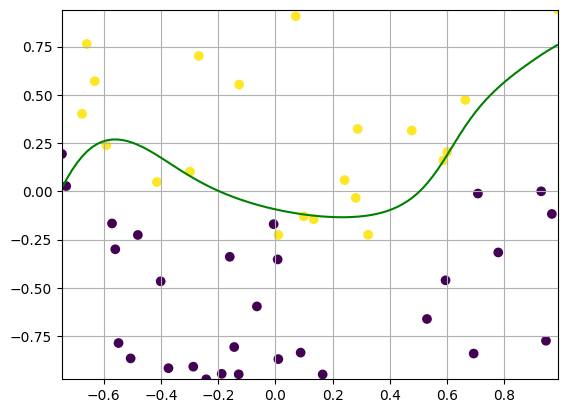

In [73]:
standard_scaler = StandardScaler()
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.fit_transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, theta)
h_range_comb.shape = x1x1.shape
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
plt.scatter(X[1,:], X[2,:], c=y, cmap="viridis")
plt.grid()

[[ 3.55570027e-01]
 [ 3.18051628e-01]
 [ 1.89679232e+00]
 [-4.89794373e-01]
 [-4.50452741e-02]
 [-2.55165208e-01]
 [-1.53479424e-01]
 [ 4.60727922e-01]
 [-4.62625412e-03]
 [ 8.03058423e-01]
 [-4.17658547e-01]
 [ 8.92234616e-02]
 [ 1.55458787e-02]
 [-2.50344068e-02]
 [-2.06712733e-01]
 [-1.96646486e-01]
 [ 2.09639504e-01]
 [-9.56583294e-03]
 [ 1.73242991e-01]
 [ 1.87317660e-02]
 [ 4.92731944e-01]
 [-3.19678777e-01]
 [ 9.30818316e-02]
 [ 2.79066625e-02]
 [ 3.94550592e-02]
 [ 1.26645458e-02]
 [-8.25952936e-03]
 [-1.64814878e-01]
 [-1.86133369e-01]
 [ 1.24891425e-01]
 [ 7.60487822e-03]
 [ 9.24440201e-02]
 [ 1.20624591e-02]
 [ 1.02373022e-01]
 [ 3.58297404e-02]
 [ 3.52402872e-01]
 [-2.48667658e-01]
 [ 8.49985213e-02]
 [ 2.79517787e-02]
 [ 4.78082284e-02]
 [ 2.74837800e-02]
 [ 3.38737309e-02]
 [ 1.21860623e-02]
 [ 2.07442889e-04]
 [-1.32811626e-01]
 [-1.66963540e-01]
 [ 9.12269044e-02]
 [ 1.78817231e-02]
 [ 6.55435375e-02]
 [ 1.99524064e-02]
 [ 6.11672119e-02]
 [ 2.06855467e-02]
 [ 7.1941203

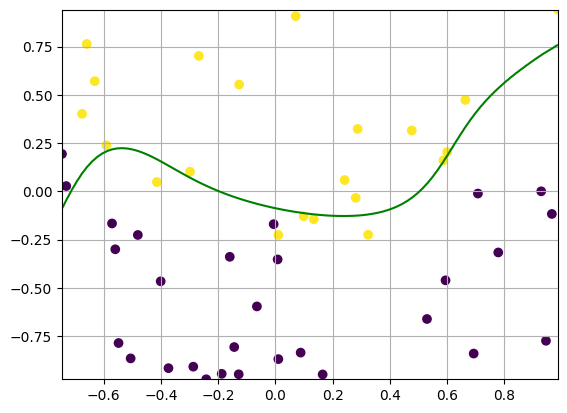

In [127]:
theta = np.zeros((55,1))
eps = 1e-5
alpha=0.0005
cost, theta = get_theta(afterEnlargement.T, y, eps, alpha, theta, 1)
print(theta, cost)

standard_scaler = StandardScaler()
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.fit_transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, theta)
h_range_comb.shape = x1x1.shape
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
plt.scatter(X[1, :], X[2, :], c=y, cmap="viridis")
plt.grid()

[[ 1.54940496]
 [ 1.48563357]
 [ 5.6681096 ]
 [-2.99224199]
 [-0.65048743]
 [-0.6342799 ]
 [-0.37295663]
 [ 1.33584023]
 [-0.07480002]
 [ 1.40515961]
 [-2.22718739]
 [ 0.13939312]
 [ 0.11243531]
 [-0.04206194]
 [-0.22446822]
 [-0.32490824]
 [ 0.5141151 ]
 [-0.04996922]
 [ 0.34072848]
 [-0.02572983]
 [ 0.57485601]
 [-1.38987347]
 [ 0.1918673 ]
 [ 0.09307898]
 [ 0.05730453]
 [ 0.08027922]
 [ 0.02849468]
 [-0.10532677]
 [-0.24202849]
 [ 0.24057484]
 [ 0.01726766]
 [ 0.17535228]
 [ 0.02086467]
 [ 0.15442194]
 [ 0.03122188]
 [ 0.33369796]
 [-0.86216022]
 [ 0.16954322]
 [ 0.07849225]
 [ 0.07303123]
 [ 0.0800996 ]
 [ 0.06073431]
 [ 0.06276417]
 [ 0.03947542]
 [-0.06236755]
 [-0.1910446 ]
 [ 0.14538188]
 [ 0.04892549]
 [ 0.11649923]
 [ 0.04778449]
 [ 0.09994427]
 [ 0.04517199]
 [ 0.09965044]
 [ 0.04835574]
 [ 0.23259066]] 2.058102206201626
[[-1.28010196e-01 -9.48147536e-01]
 [ 9.93249558e-02 -1.29355215e-01]
 [-1.59264396e-01 -3.39330358e-01]
 [-5.90702732e-01  2.38541933e-01]
 [-4.00690653e-0

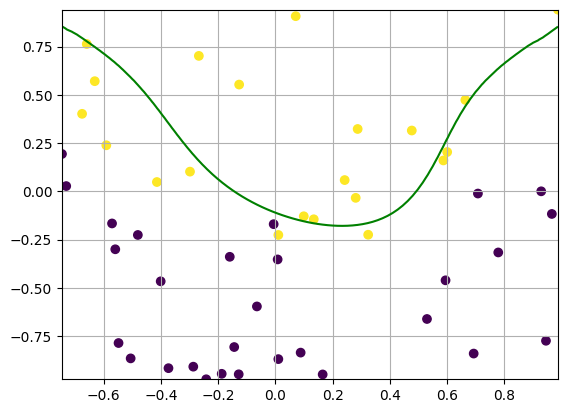

In [78]:
theta = np.zeros((55,1))
cost, theta = get_theta(afterEnlargement.T, y, eps, alpha, theta, 0.1)
print(theta, cost)

standard_scaler = StandardScaler()
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
points = np.c_[x1x1.ravel(), x2x2.ravel()]
x1x2_range_comb = standard_scaler.fit_transform(points)
x1x2_range_comb = poly_features.transform(x1x2_range_comb)
X_range_comb = x1x2_range_comb.T
h_range_comb = h_fun(X_range_comb, theta)
h_range_comb.shape = x1x1.shape
plt.contour(x1x1, x2x2, h_range_comb, levels=[0.5], colors='g')
plt.scatter(X[1, :], X[2, :], c=y, cmap="viridis")
plt.grid()


In [115]:
from sklearn.linear_model import LogisticRegression


poly_features = PolynomialFeatures(9)
Xtraining_poly = poly_features.fit_transform(data)

model = LogisticRegression()
model.fit(Xtraining_poly, y[0])
predictionY = model.predict(Xtraining_poly)
print([predictionY])

modelTheta = model.coef_
modelTheta.shape = [-1,1]
print(modelTheta)
print("cost", calculate(Xtraining_poly.T, y, modelTheta, 1))


[array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.])]
[[-4.28128212e-04]
 [ 4.89388879e-01]
 [ 2.24523877e+00]
 [-7.89434144e-01]
 [-7.81217323e-02]
 [-2.99394735e-01]
 [-1.56784996e-01]
 [ 5.45085918e-01]
 [-2.31876529e-02]
 [ 8.00194336e-01]
 [-6.13030817e-01]
 [ 8.93355592e-02]
 [ 3.21155490e-02]
 [-2.19019551e-02]
 [-1.92078289e-01]
 [-2.11765342e-01]
 [ 2.31697818e-01]
 [-1.05084534e-02]
 [ 1.75953684e-01]
 [ 5.08377530e-03]
 [ 4.41049242e-01]
 [-4.36599994e-01]
 [ 9.25650287e-02]
 [ 4.07489226e-02]
 [ 3.40688139e-02]
 [ 2.84032728e-02]
 [-1.81156070e-03]
 [-1.39729376e-01]
 [-2.00703304e-01]
 [ 1.26453759e-01]
 [ 1.36566766e-02]
 [ 9.04745401e-02]
 [ 1.48830772e-02]
 [ 9.56647838e-02]
 [ 2.70746245e-02]
 [ 2.98305612e-01]
 [-3.19427448e-01]
 [ 8.22370014e-02]
 [ 3.87568025e-02]
 [ 4.17043495e-02]
 [ 3.76631515e-0

In [139]:
poly_features = PolynomialFeatures(9)
Xtraining_poly = poly_features.fit_transform(data)

model = LogisticRegression(C=0.5)
model.fit(Xtraining_poly, y[0])
predictionY = model.predict(Xtraining_poly)
print([predictionY])

modelTheta = model.coef_
modelTheta.shape = [-1,1]
print(modelTheta)
print("cost", calculate(Xtraining_poly.T, y, modelTheta, 1))

[array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.])]
[[ 6.87603034e-06]
 [ 2.71952128e-01]
 [ 1.59347370e+00]
 [-4.55817064e-01]
 [-3.98810306e-02]
 [-2.36850730e-01]
 [-1.24234198e-01]
 [ 3.83331133e-01]
 [-4.12494614e-03]
 [ 6.47838367e-01]
 [-3.66677446e-01]
 [ 7.12473157e-02]
 [ 1.62627769e-02]
 [-1.84420020e-02]
 [-1.74123493e-01]
 [-1.58305413e-01]
 [ 1.71096602e-01]
 [-4.19242992e-03]
 [ 1.39586708e-01]
 [ 1.51717336e-02]
 [ 3.88490791e-01]
 [-2.72258007e-01]
 [ 7.38759858e-02]
 [ 2.75606058e-02]
 [ 3.09642555e-02]
 [ 1.48613026e-02]
 [-4.51120031e-03]
 [-1.34141020e-01]
 [-1.48797723e-01]
 [ 9.97364987e-02]
 [ 1.08422210e-02]
 [ 7.37481120e-02]
 [ 1.30492076e-02]
 [ 8.14994115e-02]
 [ 2.90296357e-02]
 [ 2.74485850e-01]
 [-2.07144680e-01]
 [ 6.70388844e-02]
 [ 2.76719141e-02]
 [ 3.73558024e-02]
 [ 2.63684673e-0

In [141]:
poly_features = PolynomialFeatures(9)
Xtraining_poly = poly_features.fit_transform(data)

model = LogisticRegression(C=10)
model.fit(Xtraining_poly, y[0])
predictionY = model.predict(Xtraining_poly)
print([predictionY])

modelTheta = model.coef_
modelTheta.shape = [-1,1]
print(modelTheta)
print("cost", calculate(Xtraining_poly.T, y, modelTheta, 0.1))

[array([0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.])]
[[ 6.47589844e-04]
 [ 1.47912625e+00]
 [ 5.79697401e+00]
 [-3.09524549e+00]
 [-7.51136421e-01]
 [-7.02479081e-01]
 [-4.03212539e-01]
 [ 1.31048772e+00]
 [-5.28879766e-02]
 [ 1.29490913e+00]
 [-2.31366118e+00]
 [ 1.30809660e-01]
 [ 1.46096589e-01]
 [-1.80635519e-02]
 [-1.99041113e-01]
 [-2.64028672e-01]
 [ 4.95946338e-01]
 [-3.34682300e-02]
 [ 3.19668208e-01]
 [-2.13340010e-02]
 [ 4.70653309e-01]
 [-1.40062018e+00]
 [ 1.89540299e-01]
 [ 1.12694025e-01]
 [ 6.21677917e-02]
 [ 9.78543429e-02]
 [ 5.29719594e-02]
 [-6.39470454e-02]
 [-1.48158701e-01]
 [ 2.24539341e-01]
 [ 3.37524771e-02]
 [ 1.69641103e-01]
 [ 3.24351471e-02]
 [ 1.40561087e-01]
 [ 3.24476767e-02]
 [ 2.53113747e-01]
 [-8.24905244e-01]
 [ 1.66994382e-01]
 [ 9.33995222e-02]
 [ 7.48360847e-02]
 [ 9.17373946e-0